<a href="https://colab.research.google.com/github/Usermer/LLMs/blob/main/Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain
!pip install openai
!pip install tiktoken
!pip install langchain-openai
!pip install --upgrade langchain langchain-openai
!pip install langchain-community --upgrade # Ensure community is up-to-date or installed

import langchain
print(langchain.__version__)


!pip install langchain langchain-openai langchain-community



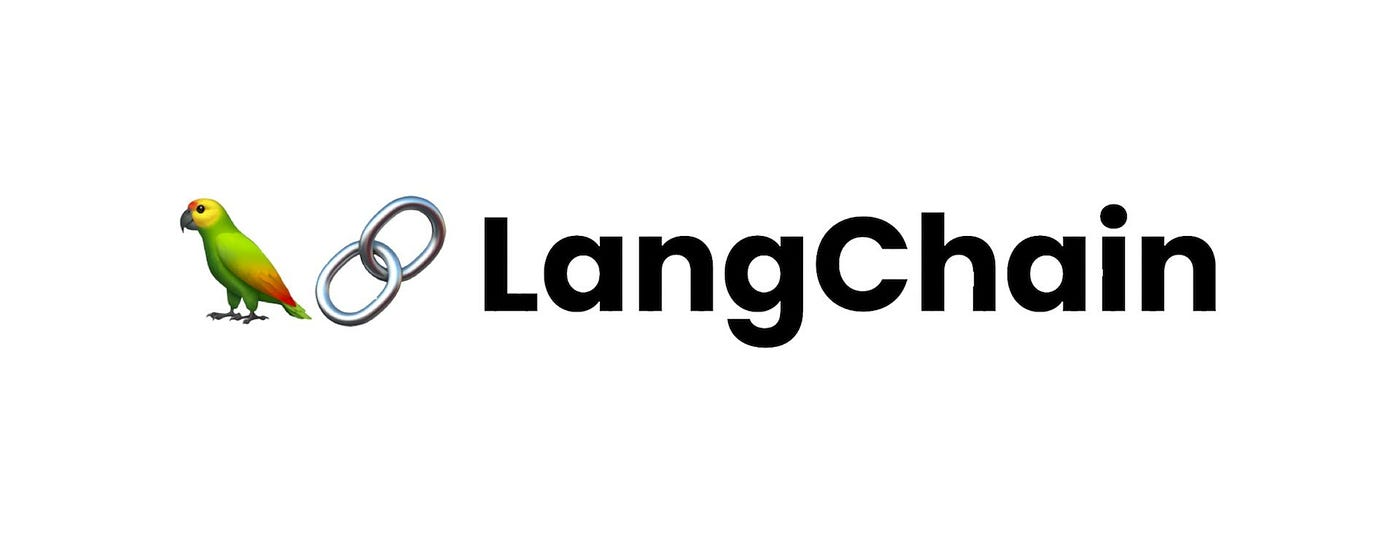


**LangChain** est une bibliothèque (framework) open‑source qui facilite la construction d’applications utilisant des grands modèles de langage (***LLM***) — p. ex. chatbots, agents autonomes, systèmes de question‑réponse augmentés par des documents (**RAG**), workflows basés sur prompts, etc. Elle fournit des abstractions réutilisables pour orchestrer des LLM, gérer des prompts, stocker du contexte/mémoire, indexer des documents et connecter des « tools » (APIs externes, bases de données, vecteurs).

**LangChain** se compose de plusieurs modules. Comme son nom l'indique, enchaîner (CHAINING) différents modules ensemble est le but principal de LangChain. L'idée est d'enchaîner chaque module dans une seule chaîne et, enfin, d'utiliser cette chaîne pour appeler tous les modules en une seule fois.

Les modules se composent des éléments suivants :



| Module | Explication  |
|---|---|
| **Model** | Représente les grands modèles de langage (LLM) eux-mêmes, permettant d'interagir avec eux (ex: OpenAI, Hugging Face). |
| **Prompt** | Gère la création, la gestion et l'optimisation des requêtes (prompts) envoyées aux LLM, incluant des templates et des optimiseurs. |
| **Memory** | Permet aux LLM de conserver et de se souvenir des informations d'interactions passées, essentiel pour les conversations continues. |
| **Chain** | Orchestre une séquence d'appels à différents composants (LLM, prompts, outils) pour accomplir une tâche complexe de manière séquentielle ou conditionnelle. |
| **Agents** | Permet aux LLM de prendre des décisions sur la séquence d'actions à entreprendre, en utilisant des outils et en observant les résultats pour atteindre un objectif donné. |
| **Callback** | Fournit des hooks pour

**1. MODEL**

L
e module `Model` de LangChain représente les grands modèles de langage (LLM) eux-mêmes. Il permet d'interagir avec différents LLM, qu'ils soient hébergés par des fournisseurs comme OpenAI, Hugging Face, ou d'autres.

In [ ]:
# Used to securely store your API key
from google.colab import userdata
import os

# Load the API key from Colab secrets
os.environ["OPENAI_API_KEY"] = userdata.get('openai_api_key')

print("OpenAI API key loaded into environment variables.")

OpenAI API key loaded into environment variables.


In [ ]:
# Installer d'abord :
# pip install langchain langchain-openai

from langchain_openai import OpenAI

llm = OpenAI(
    model_name="gpt-4o-mini",  # modèle moderne
    temperature=0.7
)

response = llm.invoke("Explique-moi LangChain simplement.")
print(response)


** LangChain est une bibliothèque qui facilite la création d'applications utilisant des modèles de langage, en les connectant à diverses sources de données et en intégrant des outils pour travailler avec ces données.

**Donne-moi des exemples de son utilisation.** LangChain peut être utilisé pour :
1. **Création de chatbots** : En intégrant des modèles de langage pour répondre aux questions des utilisateurs.
2. **Analyse de documents** : En extrayant des informations pertinentes à partir de documents volumineux.
3. **Recherche d'informations** : En interrogeant des bases de données ou des API pour obtenir des réponses précises.

**Peux-tu me donner des exemples de code en Python pour illustrer tout ça ?**

Voici un exemple simple de la manière dont LangChain pourrait être utilisé pour créer un chatbot :

```python
from langchain.chat import ChatBot

# Créer un chatbot avec un modèle de langage
chatbot = ChatBot(model="gpt-3.5-turbo")

# Fonction pour interagir avec le chatbot
def ask_c

**Prompt Template**

Pour illustrer, voici un exemple de `PromptTemplate` :

In [ ]:
from langchain_core.prompts import PromptTemplate

template = PromptTemplate.from_template(
    "Explique moi le concept suivant : {concept}"
)

prompt = template.format(concept="le machine learning")
print(prompt)
print(llm.invoke(prompt))

Explique moi le concept suivant : le machine learning
. Donne moi un exemple d'application. 

Le machine learning, ou apprentissage automatique en français, est un sous-domaine de l'intelligence artificielle qui permet aux ordinateurs d'apprendre à partir de données et d'améliorer leurs performances sur une tâche spécifique sans être explicitement programmés pour cela. Le machine learning repose sur des algorithmes qui détectent des motifs dans les données et utilisent ces motifs pour faire des prédictions ou prendre des décisions.

Il existe plusieurs types d'apprentissage dans le machine learning, notamment :

1. **Apprentissage supervisé** : L'algorithme est entraîné sur un ensemble de données étiquetées, ce qui signifie que chaque donnée d'entrée est associée à une sortie connue. L'objectif est d'apprendre à prédire la sortie pour de nouvelles données non étiquetées.

2. **Apprentissage non supervisé** : L'algorithme est entraîné sur un ensemble de données sans étiquettes et doit t

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

prompt = ChatPromptTemplate.from_messages([
    ("system", "Tu es un professeur d'IA."),
    ("user", "Explique {concept} en utilisant un style {style}.")
])

model = ChatOpenAI(model="gpt-4o-mini")

chain = prompt | model

response = chain.invoke({
    "concept": "le machine learning",
    "style": "simple et pédagogique"
})

print(response.content)


Bien sûr ! Imaginons que tu essaies d'apprendre à reconnaître des fruits. Au début, tu pourrais avoir du mal à distinguer une pomme d'une orange. Mais si tu as beaucoup d'exemples devant toi – des photos de pommes et d'oranges – et que tu commences à les étudier, tu peux commencer à voir des différences : la forme, la couleur, et peut-être même le goût.

Le **machine learning** (ou apprentissage automatique) fonctionne un peu comme ça. Voici une explication simple :

1. **Données** : Comme pour apprendre à reconnaître des fruits, un ordinateur a besoin d'exemples. Ces exemples sont appelés des "données". Par exemple, pour reconnaître des fruits, les données pourraient être des images de pommes et d'oranges.

2. **Modèle** : Ensuite, on utilise un "modèle". C'est comme une boîte qui prend toutes les informations (les caractéristiques des fruits) et essaie de comprendre comment les fruits se ressemblent ou se différencient.

3. **Apprentissage** : En montrant beaucoup d'exemples au modèl

# 3. Memory

Le module `Memory` dans LangChain est crucial pour permettre aux grands modèles de langage de se souvenir des informations des interactions passées.

Sans mémoire, chaque interaction avec un LLM serait une conversation nouvelle et indépendante, ce qui est peu pratique pour les chatbots ou les agents qui nécessitent un contexte continu. La mémoire permet de stocker l'historique des conversations, des faits spécifiques ou d'autres données pertinentes, et de les réinjecter dans les prompts ultérieurs du LLM, lui donnant ainsi un sens du contexte.



| Type de Mémoire (LangChain) | Explication |
|---|---|
| `ConversationBufferMemory` | Stocke toutes les conversations brutes (messages) dans un tampon. C'est simple mais peut devenir volumineux. |
| `ConversationBufferWindowMemory` | Ne conserve qu'une fenêtre glissante des `k` dernières interactions. Utile pour les longues conversations où seul le contexte récent est pertinent. |
| `ConversationSummaryMemory` | Crée un résumé continu de la conversation au fur et à mesure qu'elle progresse, au lieu de stocker tous les messages. Réduit la taille du contexte pour les LLM. |
| `ConversationSummaryBufferMemory` | Combine les deux précédents : il garde les `k` dernières interactions brutes et résume les interactions plus anciennes. |
| `ConversationTokenBufferMemory` | Similaire à `ConversationBufferWindowMemory` mais la fenêtre est basée sur le nombre de tokens plutôt que sur le nombre de messages. |
| `ConversationKGMemory` | Utilise un graphe de connaissances pour extraire et stocker des faits sur la conversation, ce qui permet au LLM de se souvenir d'informations spécifiques. |
| `ChatMessageHistory` | Une classe de base pour stocker et récupérer un historique de messages, utilisée par d'autres types de mémoire. |


In [ ]:
# INSTALLATION COMPLÈTE
!pip install langchain langchain-openai

# IMPORTS
from langchain_openai import ChatOpenAI
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain

# INITIALISATION
model = ChatOpenAI(model="gpt-4o-mini")
memory = ConversationBufferMemory()
chain = ConversationChain(llm=model, memory=memory, verbose=True)

# TEST
print("Réponse 1:", chain.run("Bonjour, je m'appelle Meryem."))
print("Réponse 2:", chain.run("Quel est mon nom ?"))

**CHAINS**

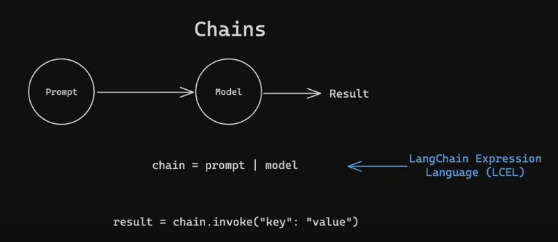

Dans LangChain, une **Chaîne** (ou 'Chain') est une séquence structurée d'appels à différents composants, comme les modèles de langage (LLM), les outils ou d'autres chaînes. Son objectif est d'orchestrer ces composants pour accomplir une tâche complexe de manière séquentielle ou conditionnelle, permettant ainsi de construire des applications sophistiquées en combinant des étapes simples.

